<h1 align="center"><b>CS420.M11.KHCL - Selected Topics in Computer Vision</b></h1>
<h1 align="center"><b>Bài tập 1 - Thống kê keyword của tiêu đề trong một hội nghị</b></h1>

**Sinh viên thực hiện:**
- Thái Trần Khánh Nguyên - 19520188

In [1]:
import requests
from bs4 import BeautifulSoup as Soup
import nltk
from nltk.corpus import stopwords

In [2]:
#Download từ điẻn stopwords
nltk.download('stopwords')
l = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
common_word = ['image', 'images', 'learning', 'using', 'object', 'via', 'video', 'images', 'visual', 'based', 'use', 'dataset', 'photo', 'data', 'prediction', 'model']

In [4]:
# Dùng để gửi request đến trang web với tham số là số thứ tự trang cần thu thập
def sendRequest(day):
  #Tạo đường liên kết đến trang cần thu thập dữ liệu
  url = "https://openaccess.thecvf.com/CVPR2020?day=2020-06-" + day
  #Gửi request đến trang đó
  request = requests.get(url)
  #BeautifulSoup dùng để phân tích dữ liệu html thành dữ liệu cây để chúng ta dễ dàng thao tác sau này
  soupSite = Soup(request.text, 'html.parser')
  return soupSite

In [10]:
def getTitle(keywords, titles):
  for title in titles:
    #Tách các từ và loại bỏ stopwords + các từ phổ biến trong CV của tiêu đề
    tmp = title.text.lower()
    str = [word for word in tmp.split(' ') if not (word in stopwords.words('english') or word in common_word)]
    #Cập nhật số lượng keyword
    for i in str:
      if i in keywords:
        keywords[i]+=1
      else:
        keywords[i]=1
  return keywords

In [22]:
def draw_plot(count):
  import matplotlib.pyplot as plt
  import numpy as np

  X, Y = [], []
  for i in sorted(count, key=count.get, reverse=True):
    X.append(i)
    Y.append(count[i])    

  plt.figure(figsize=(30,10))
  plt.xlabel('Keyword')
  plt.ylabel('Count')
  plt.title('Số lượng xuất hiện của các keyword trong hội nghị khoa học CVPR 2020 (Top 20)')
  plt.bar(X[:20], Y[:20])

  plt.show

In [7]:
def main():
  keywords = {}
  for day in ['16', '17', '18']:
    html = sendRequest(day)
    titles = html.find_all('dt')
    keywords = getTitle(keywords, titles)
  
  draw_plot(keywords)


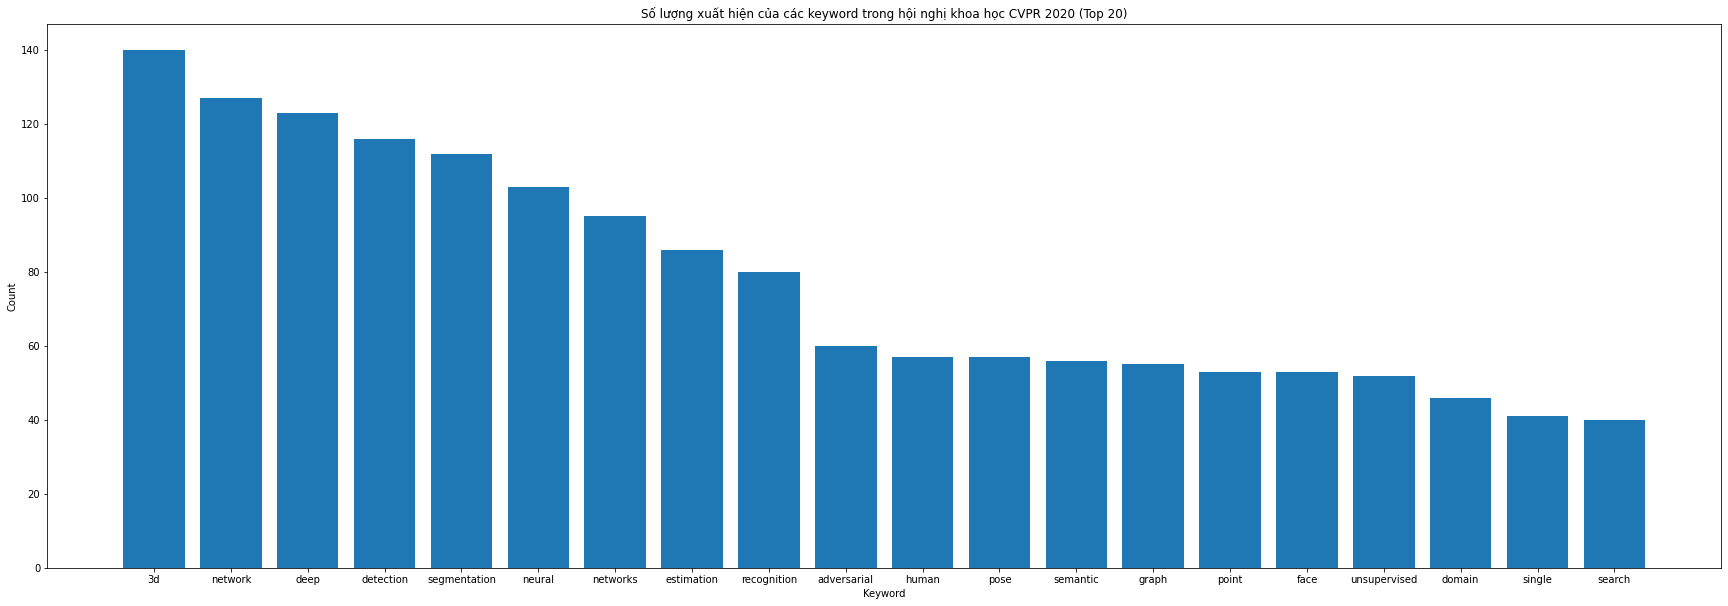

In [23]:
if __name__ == '__main__':
    main()